<a href="https://colab.research.google.com/github/Hardika1078/Collab/blob/main/Messy_vs_Clean_Room.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install numpy tensorflow opencv-python matplotlib

In [28]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
from google.colab import files

1. Import Data

Prepocessing

In [29]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        img = Image.open(os.path.join(directory, filename))
        img = img.resize((224, 224))
        img = img.convert('RGB')
        img = np.array(img) / 255.0
        images.append(img)

    return images

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
clean_images = load_images('/content/drive/MyDrive/train/clean')
messy_images = load_images('/content/drive/MyDrive/train/messy')

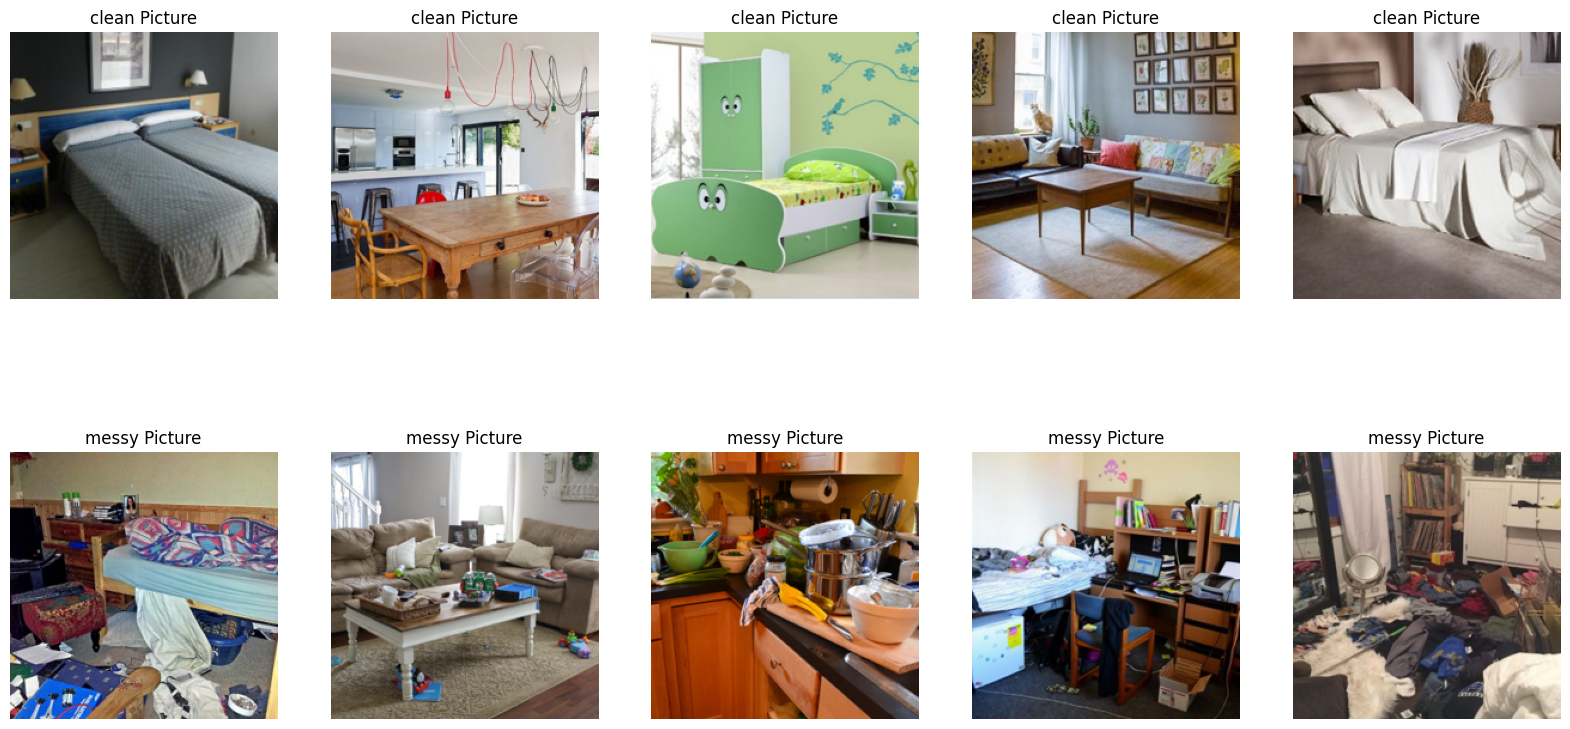

In [32]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Menampilkan gambar clean
for i in range(5):
    axes[0, i].imshow(clean_images[i])  # Menampilkan gambar clean
    axes[0, i].set_title('clean Picture')  # Menetapkan judul
    axes[0, i].axis('off')  # Mematikan axis

# Menampilkan gambar messy
for i in range(5):
    axes[1, i].imshow(messy_images[i])  # Menampilkan gambar messy
    axes[1, i].set_title('messy Picture')  # Menetapkan judul
    axes[1, i].axis('off')  # Mematikan axis

plt.show()  # Menampilkan hasil

In [33]:
type(clean_images)

list

In [34]:
len(clean_images)

96

In [35]:
len(messy_images)

96

2. Labeling

In [36]:
def assign_labels(clean_images, messy_images):
    clean_labels = np.ones(len(clean_images))
    messy_labels = np.zeros(len(messy_images))
    return clean_labels, messy_labels

clean_labels, messy_labels = assign_labels(clean_images, messy_images)

In [37]:
clean_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
messy_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
type(clean_labels)

numpy.ndarray

In [40]:
 data = clean_images + messy_images
 labels = np.concatenate((clean_labels, messy_labels) , axis=0)

In [41]:
data

[array([[[0.09019608, 0.09803922, 0.09411765],
         [0.09019608, 0.09803922, 0.09411765],
         [0.09019608, 0.09803922, 0.09411765],
         ...,
         [0.67058824, 0.67843137, 0.6745098 ],
         [0.6745098 , 0.68235294, 0.67843137],
         [0.6745098 , 0.68235294, 0.67843137]],
 
        [[0.09019608, 0.09803922, 0.09411765],
         [0.09019608, 0.09803922, 0.09411765],
         [0.09019608, 0.09803922, 0.09411765],
         ...,
         [0.67058824, 0.67843137, 0.6745098 ],
         [0.6745098 , 0.68235294, 0.67843137],
         [0.6745098 , 0.68235294, 0.67843137]],
 
        [[0.09019608, 0.09803922, 0.09411765],
         [0.09019608, 0.09803922, 0.09411765],
         [0.09019608, 0.09803922, 0.09411765],
         ...,
         [0.67058824, 0.67843137, 0.6745098 ],
         [0.6745098 , 0.68235294, 0.67843137],
         [0.6745098 , 0.68235294, 0.67843137]],
 
        ...,
 
        [[0.3254902 , 0.33333333, 0.28235294],
         [0.32941176, 0.3372549 , 0.28627

In [42]:
data[0].shape

(224, 224, 3)

3. Spliting Data

In [43]:
X = np.array(data)
y = np.array(labels)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [45]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

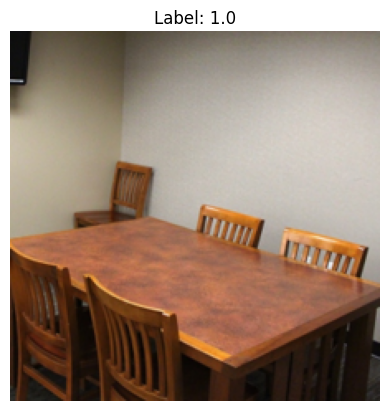

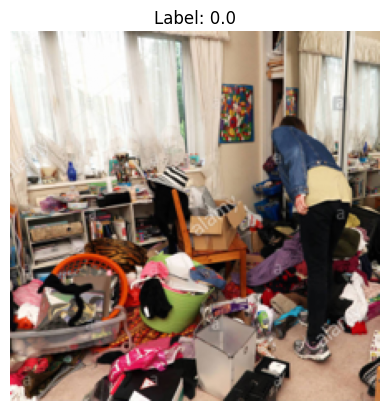

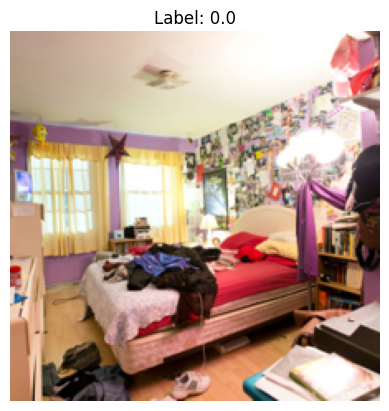

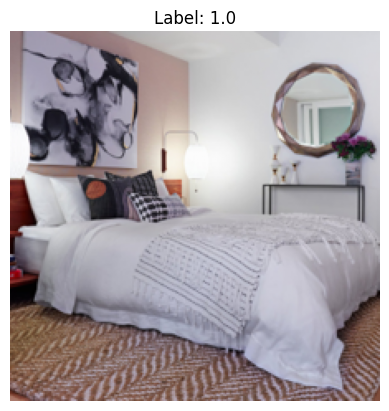

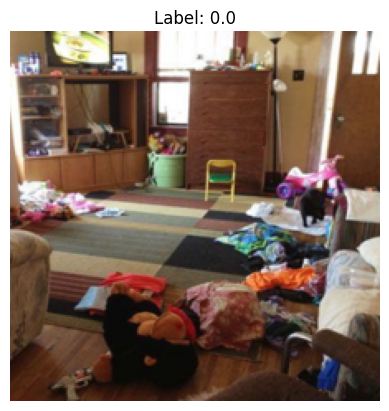

In [46]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image.numpy())
    plt.title('Label: {}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

In [47]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [48]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
text = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

4. Training Data

In [49]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3), padding='valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │     100,933,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,935,041 (385.04 MB)

 Trainable params: 100,935,041 (385.04 MB)

 Non-trainable params: 0 (0.00 B)

Mana Training

In [51]:
model.compile(optimizer = 'adam',
              loss= 'binary_crossentropy',
              metrics=["accuracy"])

In [ ]:
history = model.fit(train, validation_data = val, epochs = 20, verbose = 2)

Epoch 1/20
5/5 - 32s - 6s/step - accuracy: 0.4962 - loss: 29.2340 - val_accuracy: 0.4500 - val_loss: 19.4054
Epoch 2/20
5/5 - 38s - 8s/step - accuracy: 0.5639 - loss: 11.2434 - val_accuracy: 0.5500 - val_loss: 8.0577
Epoch 3/20
5/5 - 36s - 7s/step - accuracy: 0.6316 - loss: 7.8129 - val_accuracy: 0.8500 - val_loss: 0.5530
Epoch 4/20
5/5 - 16s - 3s/step - accuracy: 0.7143 - loss: 4.5456 - val_accuracy: 0.9000 - val_loss: 0.4923
Epoch 5/20
5/5 - 17s - 3s/step - accuracy: 0.8120 - loss: 1.6015 - val_accuracy: 0.8500 - val_loss: 0.9485
Epoch 6/20
5/5 - 16s - 3s/step - accuracy: 0.8571 - loss: 1.3426 - val_accuracy: 0.8500 - val_loss: 0.6307
Epoch 7/20
5/5 - 18s - 4s/step - accuracy: 0.8045 - loss: 1.0123 - val_accuracy: 0.9500 - val_loss: 0.1758
Epoch 8/20
5/5 - 19s - 4s/step - accuracy: 0.9023 - loss: 0.4977 - val_accuracy: 0.9500 - val_loss: 0.1258
Epoch 9/20
5/5 - 20s - 4s/step - accuracy: 0.9398 - loss: 0.1737 - val_accuracy: 0.9500 - val_loss: 0.0766
Epoch 10/20
5/5 - 17s - 3s/step - 

In [ ]:
evaluation = model.evaluate(X_test, y_test)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc='upper right')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'], loc='upper right')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

5. Testing

In [ ]:
def load_uploaded_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)

    if prediction[0][0] > 0.5:
        return "clean detected"
    else:
        return "messy detected"

In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]

img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)